# Workshop Python Image Analysis
*Martijn Wehrens, September 2025*

**Estimated time:** 30 mins presenting + 30 mins exercises


## Chapter II: Reading, modifying and displaying images

In [2]:
# Importing libraries

import matplotlib.pyplot as plt
    # used for plotting
import seaborn as sns
    # used for advanced plotting
import tifffile as tiff
    # used for reading images
    #
    # there are multiple libraries that can read image
    # from general purpose to science-specialized
    # other options:
    # skimage.io.imread(), imageio.imread(), ..
import numpy as np
    # for general math, matrix operations, etc

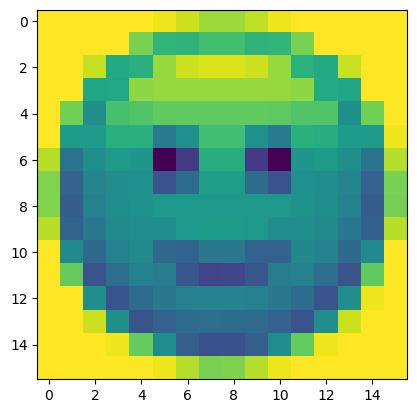

In [3]:
# Read a tif file
image_path = 'images/emoji/emoji-8bit-gray.tif'
img = tiff.imread(image_path)

_ = plt.imshow(img)

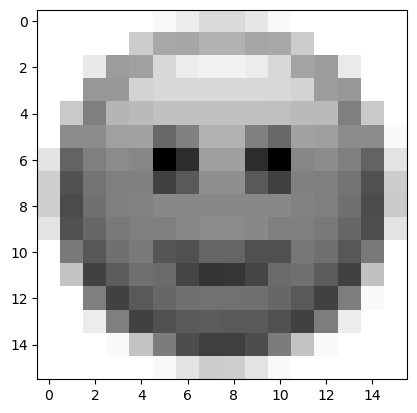

In [4]:
_ = plt.imshow(img, cmap='gray')

In [5]:
print(np.shape(img))
print(img)

(16, 16)
[[254 254 254 254 254 250 241 229 229 238 250 254 254 254 254 254]
 [254 254 254 254 220 196 195 203 203 195 196 220 254 254 254 254]
 [254 254 239 188 191 228 241 245 245 241 228 193 188 240 254 254]
 [254 254 185 186 225 228 228 228 228 228 228 225 189 185 254 254]
 [254 218 169 205 208 213 213 213 213 213 212 208 208 169 218 254]
 [254 178 178 191 192 154 170 202 202 170 155 192 190 178 178 250]
 [236 151 169 177 174  85 115 190 190 115  86 174 177 169 151 235]
 [222 139 162 169 170 128 145 179 179 145 128 170 169 162 138 220]
 [222 135 159 169 171 175 175 175 175 175 175 171 169 159 135 219]
 [236 139 153 166 169 169 175 177 177 175 169 169 166 153 137 236]
 [254 165 143 159 166 142 138 152 152 138 138 164 159 143 165 254]
 [254 214 129 146 159 156 131 120 121 131 156 159 146 129 213 254]
 [254 254 169 129 145 153 159 160 160 159 153 145 129 168 250 254]
 [254 254 241 169 129 138 144 146 145 144 138 129 168 241 254 254]
 [254 254 254 250 214 167 136 127 127 136 167 214 250

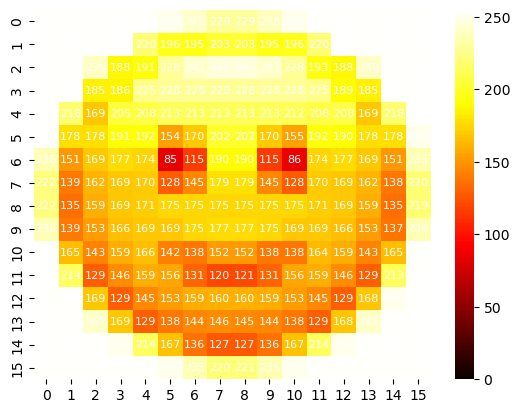

In [6]:
# Now use seaborn to generate a heatmap
_ = sns.heatmap(img, annot=True,
            fmt="d", 
            cmap='hot', 
            annot_kws={"size": 8, "color": "white"},
            vmin=0, vmax=255)
    # google: "seaborn heatmap"
    # find:
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    # google: "how to format numbers in python"
    # find: https://docs.python.org/3/library/string.html#format-specification-mini-language

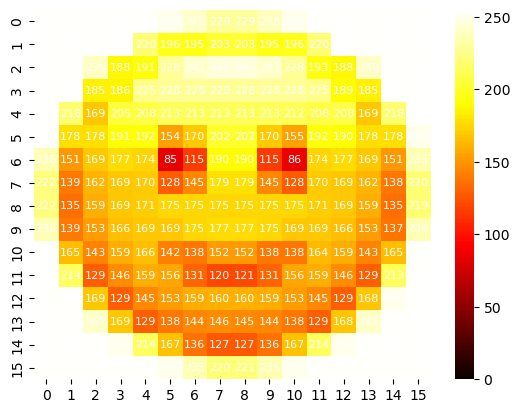

In [20]:
def mw_showimg(img, fontcol='white'):
    _ = sns.heatmap(img, annot=True,
                fmt="d", 
                cmap='hot', 
                annot_kws={"size": 8, "color": fontcol},
                vmin=0, vmax=255)

mw_showimg(img)

(array([ 2.,  2., 16., 28., 44., 29., 19., 21., 21., 74.]),
 array([ 85. , 101.9, 118.8, 135.7, 152.6, 169.5, 186.4, 203.3, 220.2,
        237.1, 254. ]),
 <BarContainer object of 10 artists>)

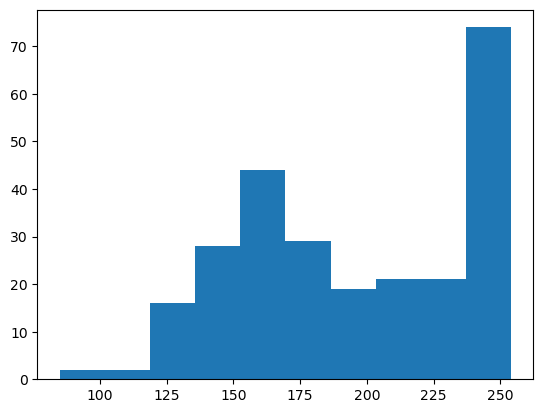

In [15]:
plt.hist(img.flatten())
    # img.flatten() vs. img.ravel()

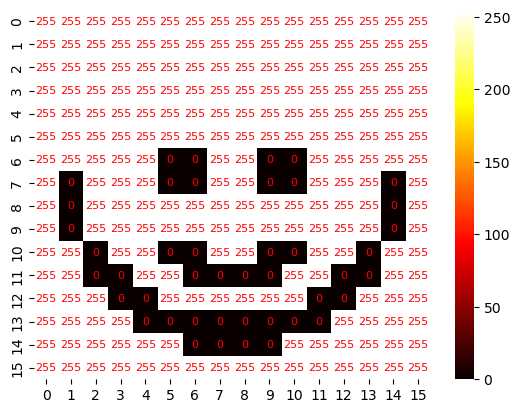

In [21]:
# Modifying an image

MY_THRESHOLD = 150

img_bw = img.copy()
img_bw[img_bw<MY_THRESHOLD]=0
img_bw[img_bw>=MY_THRESHOLD]=255

mw_showimg(img_bw, fontcol='red')

Image dimensions:  (64, 59, 3)


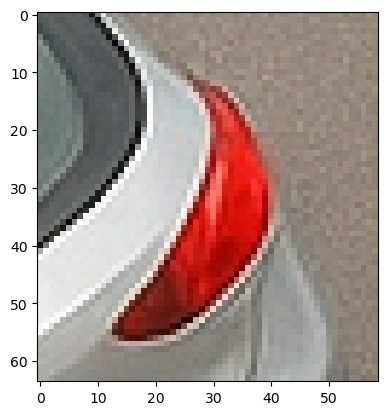

In [ ]:
# Reading an RGB image
img_path_light = 'images/car/chatGPT_shadybusiness_zoomhigh-crop3.tif'
img_carlight = tiff.imread(img_path_light)
print("Image dimensions: ",img_carlight.shape)
_ = plt.imshow(img_carlight)

Image dimensions:  (27, 3, 1024, 1024)


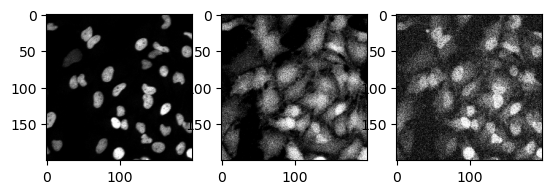

In [34]:
# Showing channels from a biology image

# Load the image
img_path_KTR = '/Users/m.wehrens/Data_notbacked/2025_Py-Image-workshop_KTR-example-data/raw/Composite_KTR.tif'
img_KTR = tiff.imread(img_path_KTR)

print("Image dimensions: ", img_KTR.shape)

# Display the three channels next to each other
fig, ax = plt.subplots(1,3)
_ = ax[0].imshow(img_KTR[0, 0, 0:200, 0:200], cmap='gray')
_ = ax[1].imshow(img_KTR[0, 1, 0:200, 0:200], cmap='gray')
_ = ax[2].imshow(img_KTR[0, 2, 0:200, 0:200], cmap='gray')


In [ ]:
# Saving an image
tiff.imwrite(file='export/img_bw.tif', data=img_bw)

### Exercises

- Read the image "chatGPT_shadybusiness_zoomhigh-custom.tif" and see if you can display it nicely.
- Can you display a zoom of the license plate?
- Can you similarly zoom and read the license plate in the image "chatGPT_shadybusiness_zoomlow-8bit.tif"?
    - Try out some different `cmap` values to display that same image.
        - What is an issue with e.g. the `hsv` and `jet` colormap, that e.g. the `viridis` and `magma` colormaps do not have?
    - What happens if add 100 to the values in that image? I.e. `img_small_plus100 = img_small+100` (Perhaps display `img_small_plus100` and investigate further.)

### Additional exercises
- Read the image "Composite_KTR.tif", select the nuclear signal (channel 0), and:
    - Use a histogram to determine a background/nuclei cutoff.
    - Create a thresholded image.
    - Using the function `plt.contour`, carefully checking the documentation, draw nuclear outlines on top of the selected nuclear image.